# Preparation

## Install Requirement

In [0]:
!pip install -q tensorflow-gpu==2.0.0-beta1
!pip install -qU watermark

## Custom Matplotlib Style

In [0]:
mpl_style = "https://gist.githubusercontent.com/m3hrdadfi/af8aca01094afb7d3e5b46de9ad8d509/raw/871ec5d721a3b438c3c896718ea4aafc91ea9744/gadfly.mplstyle"
!wget -q $mpl_style -O /root/.config/matplotlib/matplotlibrc

## General Paramas

A random seed is a number used to initialize a pseudorandom number generator. For a seed to be used in a pseudorandom number generator, it does not need to be random

In [0]:
RANDOM_SEED = 141

## Import requried packages

In [0]:
import tensorflow as tf

import requests
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime


%matplotlib inline

# IRIS Dataset

Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 

This is an exceedingly simple domain. 

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
    - Iris Setosa 
    - Iris Versicolour 
    - Iris Virginica

In [0]:
def load_iris():
    download_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    
    r = requests.get(download_link, allow_redirects=True)
    
    with open('./iris.csv', 'wb') as f:
        f.write(r.content)
    
    iris = pd.read_csv('./iris.csv', header=None)
    
    names = list(iris[iris.columns[-1]].unique())
    iris[iris.columns[-1]] = iris[iris.columns[-1]].apply(lambda x: names.index(x))
    
    x = iris[iris.columns[:-1]].values
    y = iris[iris.columns[-1]].values
    
    x_train, xt, y_train, yt = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED)
    x_valid, x_test, y_valid, y_test = train_test_split(xt, yt, test_size=0.6, random_state=RANDOM_SEED)
    
    names = {i: name for i, name in enumerate(names)}
    features = ['sepal length', 'sepal width', 'petal length', 'petal width',]
    
    return (x_train, y_train), (x_valid, y_valid), (x_test, y_test), names, features

# Load the data

In [6]:
(x_train, y_train), (x_valid, y_valid), (x_test, y_test), classes, features = load_iris()


y_train_c = tf.keras.utils.to_categorical(y_train)
y_valid_c = tf.keras.utils.to_categorical(y_valid)
y_test_c = tf.keras.utils.to_categorical(y_test)

print('Train set: \tx=> %s,\t y=> %s,\t y=> %s' % (x_train.shape, y_train.shape, y_train_c.shape))
print('Valid set: \tx=> %s,\t y=> %s,\t y=> %s' % (x_valid.shape, y_valid.shape, y_valid_c.shape))
print('Test set: \tx=> %s,\t y=> %s,\t y=> %s' % (x_test.shape, y_test.shape, y_test_c.shape))
print()
print('Features:\tc=> %s' % (features))
print('Classes:\tc=> %s' % (classes))

Train set: 	x=> (105, 4),	 y=> (105,),	 y=> (105, 3)
Valid set: 	x=> (18, 4),	 y=> (18,),	 y=> (18, 3)
Test set: 	x=> (27, 4),	 y=> (27,),	 y=> (27, 3)

Features:	c=> ['sepal length', 'sepal width', 'petal length', 'petal width']
Classes:	c=> {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


# Visualize the data

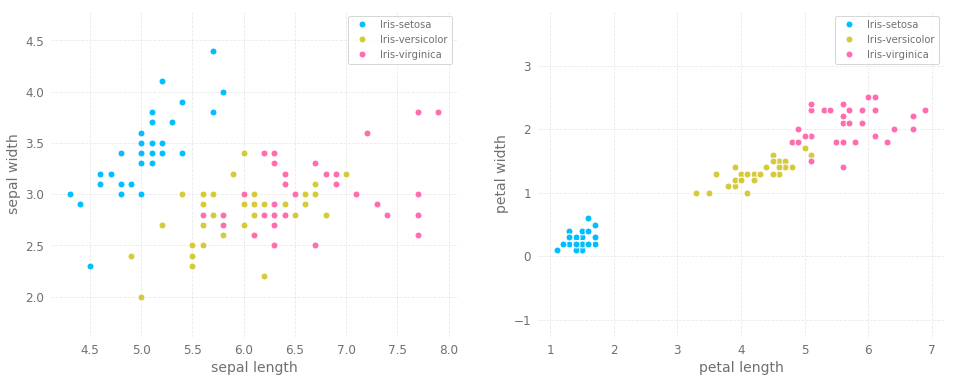

In [7]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for i, name in classes.items():
    x_plot = x_train[y_train == i]
    plt.plot(x_plot[:, 0], x_plot[:, 1], linestyle='none', marker='o', label=name)
    
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for i, name in classes.items():
    x_plot = x_train[y_train == i]
    plt.plot(x_plot[:, 2], x_plot[:, 3], linestyle='none', marker='o', label=name)
    
plt.xlabel(features[2])
plt.ylabel(features[3])
plt.axis('equal')
plt.legend();

# Preprocessing

In [0]:
# Scaler [standard-scaler]
## your code comes here

# Train Fit and Scaled
## your code comes here

# Valid Scaled
## your code comes here

# Test Scaled
## your code comes here

print('Original Train: %s,\t Standard Train: %s' % (x_train[0], x_train_scaled[0]))

**The answer:**

```Original Train: [5.9 3.2 4.8 1.8],	 Standard Train: [0.08807936 0.30907539 0.60380199 0.8074111 ]```

# Configure Neural Network Models

## Create non-linear model

In [0]:
def build_model():
    # model architecture comes here, then remove ```model = None``` and enter your code.
    model = None
    
    return model

## Summary of the model

In [0]:
model = build_model()
model.summary()

**The answer:**

<pre>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_26 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 27        
=================================================================
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________
</pre>

## Tensorboard callbacks

In [0]:
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

## Fit non-linear model.

In [0]:
BATCH_SIZE = 2
EPOCHS = 100
VERBOSE = 1
CALLBACKES = [tensorboard_callback]

In [0]:
# [Fitting] code comes here

In [0]:
# [Fitting Hisoty] code comes here

**The answer:**

```history_list ['loss', 'accuracy', 'val_loss', 'val_accuracy']```

## Plotting

In [0]:
# Plot with Sub-Plots come here

**The answer: must be something like these plots**

<p align="center">
    <img src="https://res.cloudinary.com/dltf2/image/upload/v1563871742/workshops/assignments/Screen_Shot_2019-07-23_at_1.18.19_PM_v30xdt.png">
</p>

## Evaluation

In [0]:
# evaluation code comes here

**The answer: muse be higher than our result**

```Loss: 0.199	 Accuracy: 96.30%```

## Accuracy of the predicted values

In [0]:
# reports come here

**The answer:**

<pre>
Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        12

    accuracy                           0.96        27
   macro avg       0.96      0.97      0.97        27
weighted avg       0.97      0.96      0.96        27

Confusion matrix:
[[ 7  0  0]
 [ 0  8  0]
 [ 0  1 11]]
<pre>